# Explore Seed Households Data

This notebook explores the `data/seed_households.csv` file.

## Dataset Description
The `data/seed_households.csv` file contains the initial "seed" household data used for population synthesis.

### Key Columns:
- **SERIALNO**: Household serial number.
- **NP**: Number of persons in the household.
- **HINCP**: Household income (past 12 months).
- **VEH**: Vehicles available.
- **PUMA**: Public Use Microdata Area code (geographic unit).
- **ST**: State FIPS code.
- **WGTP**: Household weight.

This file serves as the disaggregate pool of households from which the synthesizer draws.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
df = pd.read_csv('data/seed_households.csv')
print(f"Data loaded. Shape: {df.shape}")

Data loaded. Shape: (4841, 198)


In [4]:
df.head()

,RT,SERIALNO,DIVISION,PUMA,REGION,ST,ADJHSG,ADJINC,WGTP,NP,...,WGTP80,AGEHOH,HTYPE,NWESR,nuniv_schg,HHINCADJ,famTag,dupcount,n,hhnum
0,H,2006000000530,9,600,4,41,1081391,1098342,42,4,...,40,35,1,2,0,6191.9546,1,1,1,1
1,H,2006000002056,9,600,4,41,1081391,1098342,18,1,...,18,66,4,0,0,19185.4670,0,1,1,2
2,H,2006000005620,9,600,4,41,1081391,1098342,19,2,...,23,57,1,2,0,73376.6800,1,1,1,3
3,H,2006000012137,9,600,4,41,1081391,1098342,18,2,...,18,84,1,1,0,74575.7660,1,1,1,4
4,H,2006000012450,9,600,4,41,1081391,1098342,4,1,...,1,89,1,0,0,7736.0757,0,1,1,5


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4841 entries, 0 to 4840
Columns: 198 entries, RT to hhnum
dtypes: float64(27), int64(170), object(1)
memory usage: 7.3+ MB


In [6]:
df.describe()

,SERIALNO,DIVISION,PUMA,REGION,ST,ADJHSG,ADJINC,WGTP,NP,TYPE,...,WGTP80,AGEHOH,HTYPE,NWESR,nuniv_schg,HHINCADJ,famTag,dupcount,n,hhnum
count,4.841000e+03,4841.0,4841.0,4841.0,4841.0,4.841000e+03,4.841000e+03,4841.000000,4841.000000,4841.0,...,4841.000000,4841.000000,4841.000000,4841.000000,4841.000000,4841.000000,4841.000000,4841.000000,4841.000000,4841.000000
mean,2.008031e+12,9.0,600.0,4.0,41.0,1.031839e+06,1.043837e+06,16.016526,2.423879,1.0,...,18.736625,49.403016,1.539558,1.155960,0.353646,42789.734459,0.642842,1.259451,1.129725,2421.000000
std,1.417393e+09,0.0,0.0,0.0,0.0,2.975106e+04,3.411417e+04,11.651505,1.339190,0.0,...,16.504139,18.345742,0.850216,0.937428,0.710395,38028.979199,0.479211,0.438378,0.336036,1397.620657
min,2.006000e+12,9.0,600.0,4.0,41.0,1.000000e+06,1.007624e+06,0.000000,1.000000,1.0,...,-5.000000,17.000000,1.000000,0.000000,0.000000,-723.462460,0.000000,1.000000,1.000000,1.000000
25%,2.007000e+12,9.0,600.0,4.0,41.0,1.012650e+06,1.015979e+06,8.000000,1.000000,1.0,...,7.000000,34.000000,1.000000,0.000000,0.000000,16793.936000,0.000000,1.000000,1.000000,1211.000000
50%,2.008001e+12,9.0,600.0,4.0,41.0,1.016508e+06,1.031272e+06,14.000000,2.000000,1.0,...,15.000000,50.000000,1.000000,1.000000,0.000000,33889.109000,1.000000,1.000000,1.000000,2421.000000
75%,2.009001e+12,9.0,600.0,4.0,41.0,1.051560e+06,1.069212e+06,20.000000,3.000000,1.0,...,24.000000,62.000000,2.000000,2.000000,1.000000,57841.520000,1.000000,2.000000,1.000000,3631.000000
max,2.010001e+12,9.0,600.0,4.0,41.0,1.081391e+06,1.098342e+06,118.000000,12.000000,1.0,...,146.000000,94.000000,4.000000,6.000000,8.000000,328799.660000,1.000000,2.000000,2.000000,4841.000000


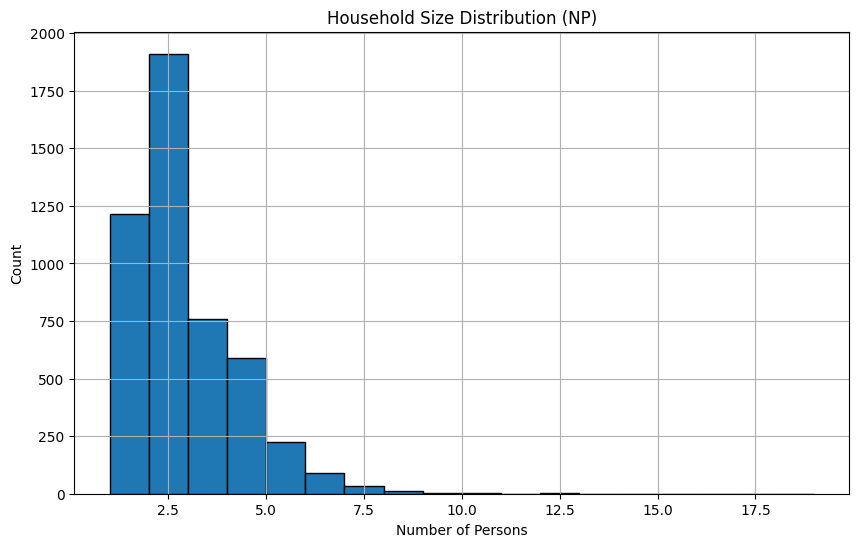

Average Household Size: 2.42


In [7]:
# Analyze Household Size (NP)
if 'NP' in df.columns:
    plt.figure(figsize=(10, 6))
    df['NP'].hist(bins=range(1, 20), edgecolor='black')
    plt.title('Household Size Distribution (NP)')
    plt.xlabel('Number of Persons')
    plt.ylabel('Count')
    plt.show()
    print(f"Average Household Size: {df['NP'].mean():.2f}")

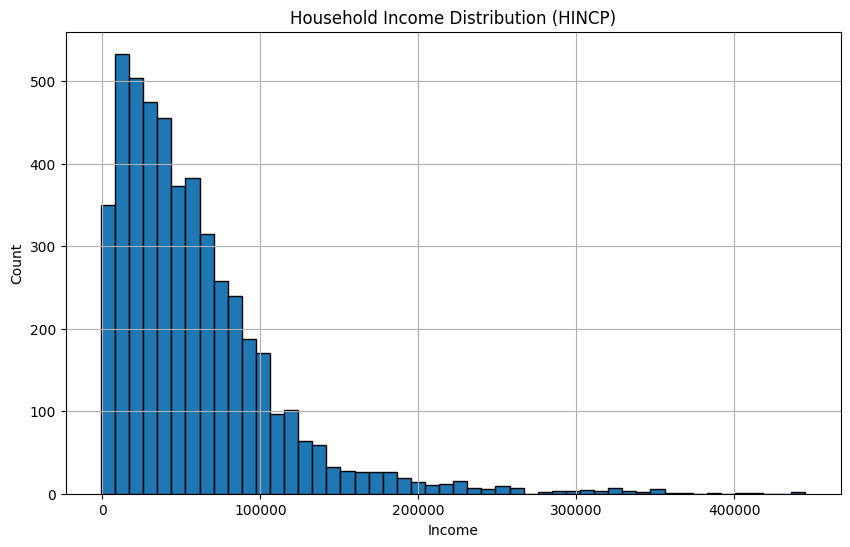

Median Household Income: 45500.00


In [8]:
# Analyze Household Income (HINCP)
if 'HINCP' in df.columns:
    plt.figure(figsize=(10, 6))
    # Filter out extremely high incomes for better visibility if needed, or just standard hist
    df['HINCP'].hist(bins=50, edgecolor='black')
    plt.title('Household Income Distribution (HINCP)')
    plt.xlabel('Income')
    plt.ylabel('Count')
    plt.show()
    print(f"Median Household Income: {df['HINCP'].median():.2f}")

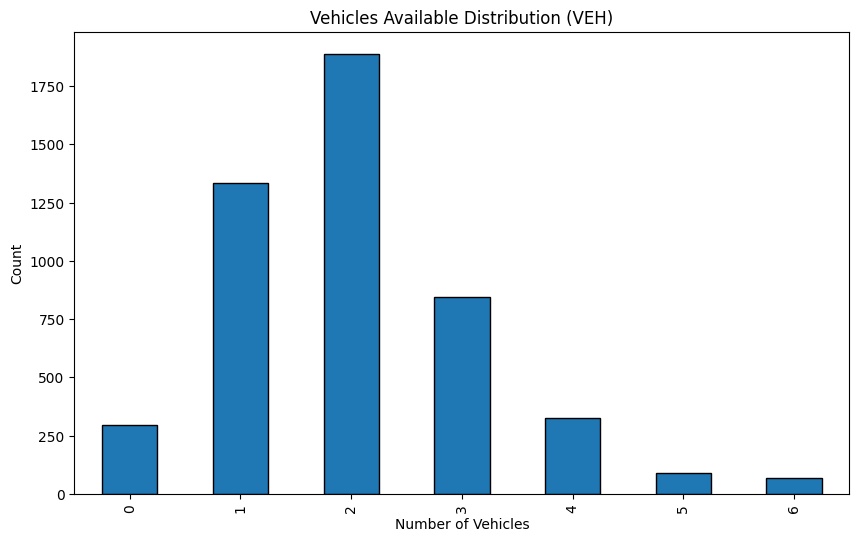

Average Vehicles: 2.02


In [9]:
# Analyze Vehicles Available (VEH)
if 'VEH' in df.columns:
    plt.figure(figsize=(10, 6))
    df['VEH'].value_counts().sort_index().plot(kind='bar', edgecolor='black')
    plt.title('Vehicles Available Distribution (VEH)')
    plt.xlabel('Number of Vehicles')
    plt.ylabel('Count')
    plt.show()
    print(f"Average Vehicles: {df['VEH'].mean():.2f}")